In [1]:
import argparse
import time
import os 
import torch 
import sys 
from data.dataloader02 import NumpyMetaDataset 
from matplotlib import pyplot
import umap 
import pandas as pd
import statsmodels.api as sm
import matplotlib.pylab as plt
# from pandas.plotting import andrews_curves
from torch.autograd import Variable
from nn.crossformer import CrossFormer
import phate
from sklearn.decomposition import PCA

def normalize_input(x, range_type='[-1,1]'):  
 
    if range_type == '[0,1]':
        # Normalize the tensor to the range [0, 1]
        x_min = torch.min(x)
        x_max = torch.max(x)
        x_norm = (x - x_min) / (x_max - x_min)
    elif range_type == '[-1,1]':
        # Normalize the tensor to the range [-1, 1]
        x_min = torch.min(x)
        x_max = torch.max(x)
        x_norm = ((x - x_min) / (x_max - x_min)) * 2 - 1
    else:
        raise ValueError("Invalid range type. Valid options are '[0,1]' or '[-1,1]'.")

    return x_norm


colors = [
    'aliceblue',
    'antiquewhite',
    'aqua',
    'aquamarine',
    'azure',
    'beige',
    'bisque',
    'black',
    'blanchedalmond',
    'blue',
    'blueviolet',
    'brown',
    'burlywood',
    'cadetblue',
    'chartreuse',
    'chocolate',
    'coral',
    'cornflowerblue',
    'cornsilk',
    'crimson',
    'cyan',
    'darkblue',
    'darkcyan',
    'darkgoldenrod',
    'darkgray',
    'darkgrey',
    'darkgreen',
    'darkkhaki',
    'darkmagenta',
    'darkolivegreen',
    'darkorange',
    'darkorchid',
    'darkred',
    'darksalmon',
    'darkseagreen',
    'darkslateblue',
    'darkslategray',
    'darkslategrey',
    'darkturquoise',
    'darkviolet',
    'deeppink',
    'deepskyblue',
    'dimgray',
    'dimgrey',
    'dodgerblue',
    'firebrick',
    'floralwhite',
    'forestgreen',
    'fuchsia',
    'gainsboro',
    'ghostwhite',
    'gold',
    'goldenrod',
    'gray',
    'grey',
    'green',
    'greenyellow',
    'honeydew',
    'hotpink',
    'indianred',
    'indigo',
    'ivory',
    'khaki',
    'lavender',
    'lavenderblush',
    'lawngreen',
    'lemonchiffon',
    'lightblue',
    'lightcoral',
    'lightcyan',
    'lightgoldenrodyellow',
    'lightgray',
    'lightgrey',
    'lightgreen',
    'lightpink',
    'lightsalmon',
    'lightseagreen',
    'lightskyblue',
    'lightslategray',
    'lightslategrey',
    'lightsteelblue',
    'lightyellow',
    'lime',
    'limegreen',
    'linen',
    'magenta',
    'maroon',
    'mediumaquamarine',
    'mediumblue',
    'mediumorchid',
    'mediumpurple',
    'mediumseagreen',
    'mediumslateblue',
    'mediumspringgreen',
    'mediumturquoise',
    'mediumvioletred',
    'midnightblue',
    'mintcream',
    'mistyrose',
    'moccasin',
    'navajowhite',
    'navy',
    'oldlace',
    'olive',
    'olivedrab',
    'orange',
    'orangered',
    'orchid',
    'palegoldenrod',
    'palegreen',
    'paleturquoise',
    'palevioletred',
    'papayawhip',
    'peachpuff',
    'peru',
    'pink',
    'plum',
    'powderblue',
    'purple',
    'red',
    'rosybrown',
    'royalblue',
    'saddlebrown',
    'salmon',
    'sandybrown',
    'seagreen',
    'seashell',
    'sienna',
    'silver',
    'skyblue',
    'slateblue',
    'slate']
print(len(colors))

/gpfs/gibbs/project/krishnaswamy_smita/aa2793/conda_envs/pytorch_fmri/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


132


In [2]:
def two_data_time_viz(z_viz, z_viz_hat):
    print("z_viz.shape", z_viz.shape)
    data1 = torch.tensor(z_viz)  
    data2 = torch.tensor(z_viz_hat)

    data1 = data1.reshape(106, -1, 2)  
    data2 = data2.reshape(106, -1, 2)
    fig, axs = plt.subplots(nrows=21, ncols=5, figsize=(12, 8))

    time = 0
    for i in range(21):
        for j in range(5):
            x1 = data1[time, :, :].numpy() 
            x2 = data2[time, :, :].numpy() 
            time += 1
            if j == 0:
                axs[i,j].plot(x1[:, 0], color='red', alpha=0.6, linewidth=1) 
                axs[i,j].plot(x2[:, 0], color='blue', alpha=0.4, linewidth=1) 
            elif j == 1:
                axs[i,j].plot(x1[:, 0], color='red', alpha=0.6, linewidth=1) 
                axs[i,j].plot(x2[:, 0], color='blue', alpha=0.3, linewidth=1)
            else:
                axs[i,j].plot(x1[:, 0], color='red', alpha=0.6, linewidth=1)  
                axs[i,j].plot(x2[:, 0], color='blue', alpha=0.3, linewidth=1)
            axs[i,j].set_xlabel('')
            axs[i,j].set_ylabel('')

            axs[i,j].set_xticks([])
            axs[i,j].set_yticks([])
            axs[i,j].spines['top'].set_alpha(0.2)
            axs[i,j].spines['right'].set_alpha(0.2)
            axs[i,j].spines['bottom'].set_alpha(0.2)
            axs[i,j].spines['left'].set_alpha(0.2) 

    # show the plot
    plt.show()
    

def one_data_time_viz(z_viz, color='red'):
    print("z_viz.shape", z_viz.shape)
    data1 = torch.tensor(z_viz)   

    data1 = data1.reshape(106, -1, 2)   
    fig, axs = plt.subplots(nrows=21, ncols=5, figsize=(12, 8))

    time = 0
    for i in range(21):
        for j in range(5):
            x1 = data1[time, :, :].numpy()  
            time += 1
            if j == 0:
                axs[i,j].plot(x1[:, 0], color=color, alpha=0.6, linewidth=1)  
            elif j == 1:
                axs[i,j].plot(x1[:, 0], color=color, alpha=0.6, linewidth=1)  
            else:
                axs[i,j].plot(x1[:, 0], color=color, alpha=0.6, linewidth=1)   
            axs[i,j].set_xlabel('')
            axs[i,j].set_ylabel('')

            axs[i,j].set_xticks([])
            axs[i,j].set_yticks([])
            axs[i,j].spines['top'].set_alpha(0.2)
            axs[i,j].spines['right'].set_alpha(0.2)
            axs[i,j].spines['bottom'].set_alpha(0.2)
            axs[i,j].spines['left'].set_alpha(0.2) 

    # show the plot
    plt.show()
    
def pca_phate(x, viz_method = 'phate', colors= 'red'):
    plt.figure(figsize=(10, 10))
    plt.rcParams.update({'font.size': 9}) 
    x_viz = x.reshape(-1, x.shape[-1]).numpy()
    if viz_method == 'phate':
        z_viz = phate.PHATE(2,  k=15, t = 5).fit_transform(x_viz)
#         z_viz = phate.PHATE().fit_transform(x_viz)
    elif viz_method == 'pca': 
        z_viz = PCA(2).fit_transform(x_viz) 
    plt.scatter(z_viz[:, 0], z_viz[:, 1], marker="o", s=15, color=colors, alpha=0.3)
    print(z_viz.shape)
    return z_viz

In [3]:
dataloader = NumpyMetaDataset(meg_dir = '/gpfs/gibbs/pi/krishnaswamy_smita/fmri-meg/meg/samples_240/train/', 
                        fmri_dir =  '/gpfs/gibbs/pi/krishnaswamy_smita/fmri-meg/fmri/samples_30/train/', 
                        n_way = 106, 
                        batch_size = 1, 
                        shuffle=True) 
# device = torch.device("cuda:0")
device = 'cpu'
for it, (xm, xf, y_batch, y_meta) in enumerate(dataloader):  
    xm = torch.stack([torch.from_numpy(arr) for arr in xm]).squeeze(1) #.to(device)
    xf = torch.stack([torch.from_numpy(arr) for arr in xf]).squeeze(1) #.to(device)
    xm, xf = xm.float(), xf.float()
    break

In [4]:
print('xm.shape', xm.shape)
print('xf.shape', xf.shape)

xm.shape torch.Size([106, 240, 20484])
xf.shape torch.Size([106, 30, 20484])


In [5]:
device = 'cpu'
model = CrossFormer(
        input_dim = 20484,
        dim = 1024, 
        depth = 6, 
        heads = 8, 
        mlp_dim = 1024, 
        dim_head = 64,
        device = device)
model = model.to(device) 

it = 2500
# /home/aa2793/project/yale23/fMRI-Reconstruction/train_logs/ith_and_best_model/contrastive_pn-20230329-221010
# /home/aa2793/project/yale23/fMRI-Reconstruction/train_logs/ith_and_best_model/contrastive_pn-20230329-222101/ith_0_modelcontrastive_pn-20230329-222101.pth
key = 'contrastive-20230331-022654'
pwd = '/home/aa2793/project/yale23/fMRI-Reconstruction/train_logs/ith_and_best_model/'+ key+'/ith_'+str(it)+'_model'+key+'.pth'

model_pth = torch.load(pwd, map_location=torch.device('cpu'))
model.load_state_dict(model_pth['model'])

<All keys matched successfully>

In [11]:
xm, xf = Variable(xm.float()), Variable(xf.float()) 
[loss_a, loss_m, loss_f], acc_a, [xm, xf, zf, zm, zf_tf, zm_tf, xm_hat, xf_hat]   = model.forward_contrastive(xm, xf)

In [ ]:
z_viz = phate.PHATE().fit_transform(zm.detach().reshape(-1, zf.shape[-1]))
# z_viz = PCA(2).fit_transform(zf.detach().reshape(-1, zf.shape[-1]).numpy())   

plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 9})  
plt.scatter(z_viz[:, 0], z_viz[:, 1], marker="o", s=15, color='red', alpha=0.07)

Calculating PHATE...
  Running PHATE on 25440 observations and 1024 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...


In [ ]:
plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 9})
z_viz = torch.tensor(z_viz).unsqueeze(1).view(106, 30, 2)
for t in range(z_viz.shape[0]):
    z_viz_t = z_viz[t,  :]
    plt.scatter(z_viz_t[:, 0], z_viz_t[:, 1], marker="o", s=10 , color=colors[t], alpha=0.7)
#     plt.scatter(zf_conv_viz_t[:, 0], zf_conv_viz_t[:, 1], marker="o", s=60 , color='red', alpha=alpha[t])
plt.show

Calculating PHATE...
  Running PHATE on 3180 observations and 1024 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.11 seconds.
    Calculating KNN search...
    Calculated KNN search in 1.04 seconds.
    Calculating affinities...
    Calculated affinities in 0.55 seconds.
  Calculated graph and diffusion operator in 1.71 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 0.28 seconds.
    Calculating KMeans...
    Calculated KMeans in 1.24 seconds.
  Calculated landmark operator in 2.22 seconds.
  Calculating optimal t...
    Automatically selected t = 8
  Calculated optimal t in 0.44 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.04 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 3.70 seconds.
Calculated PHATE in 8.12 seconds.


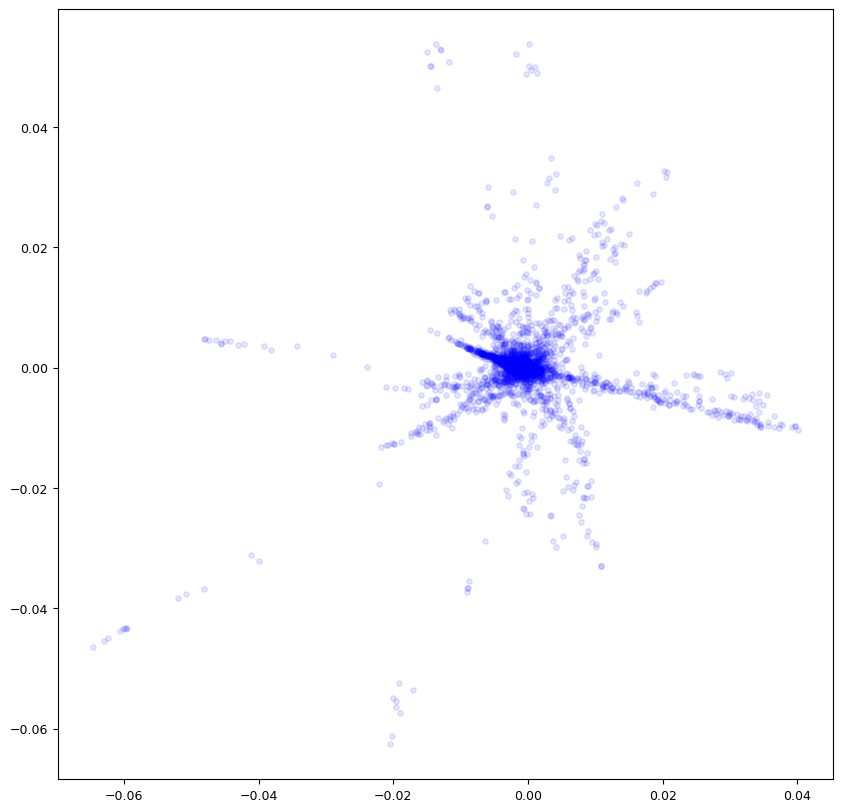

In [22]:
z_viz = phate.PHATE().fit_transform(zf.detach().reshape(-1, zf.shape[-1]))
# z_viz = PCA(2).fit_transform(zf.detach().reshape(-1, zf.shape[-1]).numpy())   
 
 
plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 9})  
plt.scatter(z_viz[:, 0], z_viz[:, 1], marker="o", s=15, color='blue', alpha=0.1)
 


<function matplotlib.pyplot.show(close=None, block=None)>

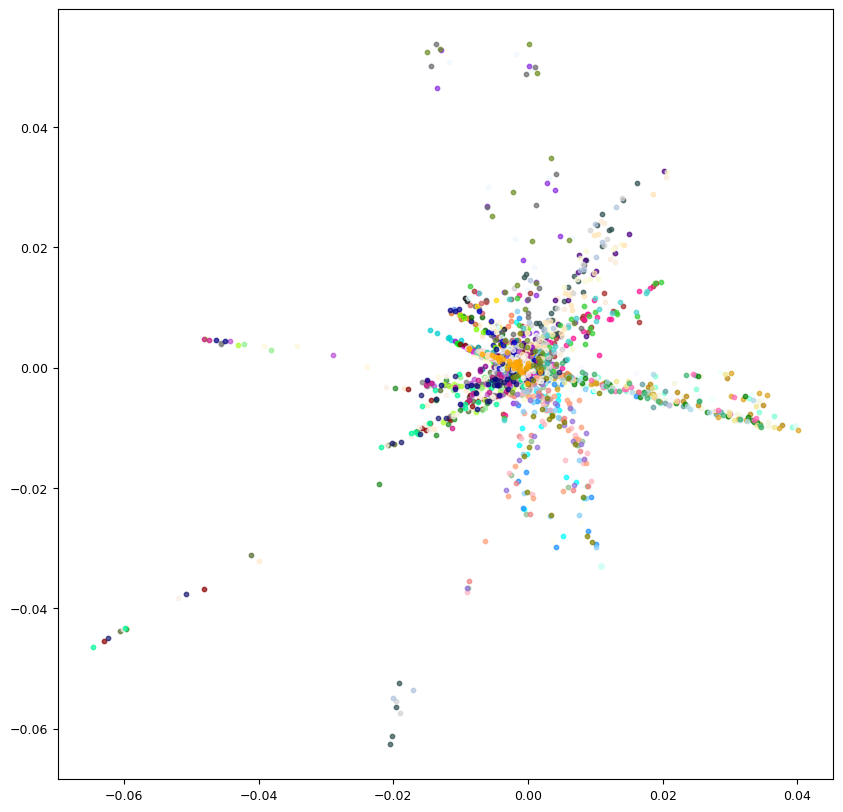

In [23]:
plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 9})
z_viz = torch.tensor(z_viz).unsqueeze(1).view(106, 30, 2)
for t in range(z_viz.shape[0]):
    z_viz_t = z_viz[t,  :]
    plt.scatter(z_viz_t[:, 0], z_viz_t[:, 1], marker="o", s=10 , color=colors[t], alpha=0.7)
#     plt.scatter(zf_conv_viz_t[:, 0], zf_conv_viz_t[:, 1], marker="o", s=60 , color='red', alpha=alpha[t])
plt.show

Calculating PHATE...
  Running PHATE on 3180 observations and 1024 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.11 seconds.
    Calculating KNN search...
    Calculated KNN search in 1.05 seconds.
    Calculating affinities...
    Calculated affinities in 0.55 seconds.
  Calculated graph and diffusion operator in 1.73 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 0.28 seconds.
    Calculating KMeans...
    Calculated KMeans in 1.19 seconds.
  Calculated landmark operator in 2.15 seconds.
  Calculating optimal t...
    Automatically selected t = 10
  Calculated optimal t in 0.44 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.05 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 3.53 seconds.
Calculated PHATE in 7.91 seconds.
torch.Size([3180, 2])
torch.Size([0, 2])


<function matplotlib.pyplot.show(close=None, block=None)>

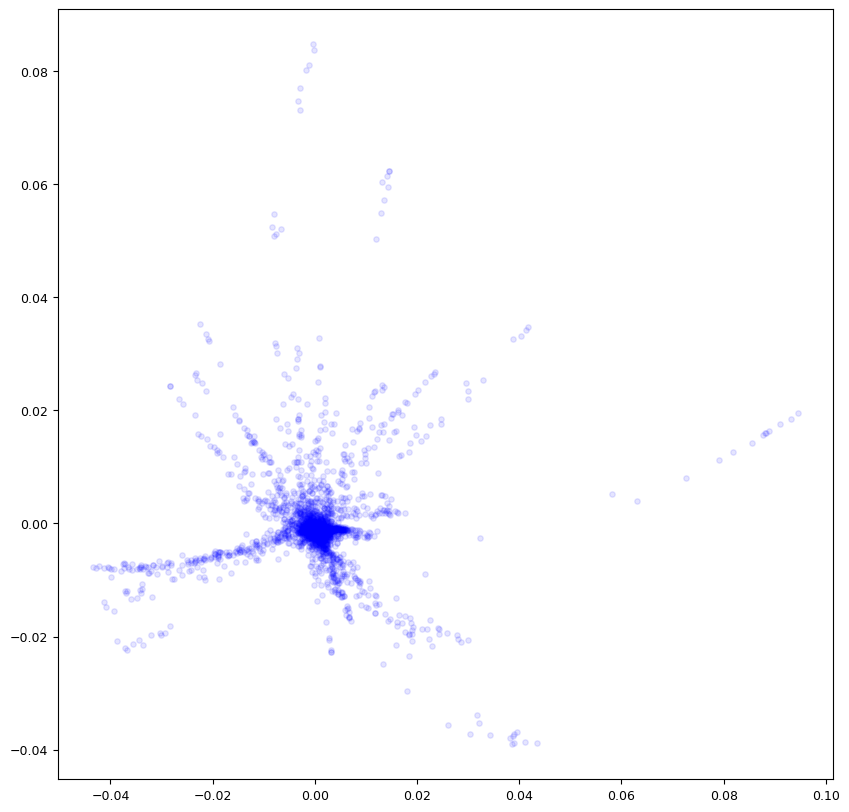

In [19]:
# zf = torch.cat((zf_spatio, zf), dim=0)
# z_viz = phate.PHATE(2,  k=1, t = 20).fit_transform(zf.detach().reshape(-1, zf.shape[-1]))
z_viz = phate.PHATE().fit_transform(zf.detach().reshape(-1, zf.shape[-1]))
# z_viz = PCA(2).fit_transform(zf.detach().reshape(-1, zf.shape[-1]).numpy())   

zf_real = torch.tensor(z_viz[:106*30, :]) 
zf_cros = torch.tensor(z_viz[106*30:, :]) 

print(zf_real.shape)
print(zf_cros.shape)

plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 9})  
plt.scatter(zf_real[:, 0], zf_real[:, 1], marker="o", s=15, color='blue', alpha=0.1)
plt.scatter(zf_cros[:, 0], zf_cros[:, 1], marker="*", s=15, color='red', alpha=0.2)
 
plt.show

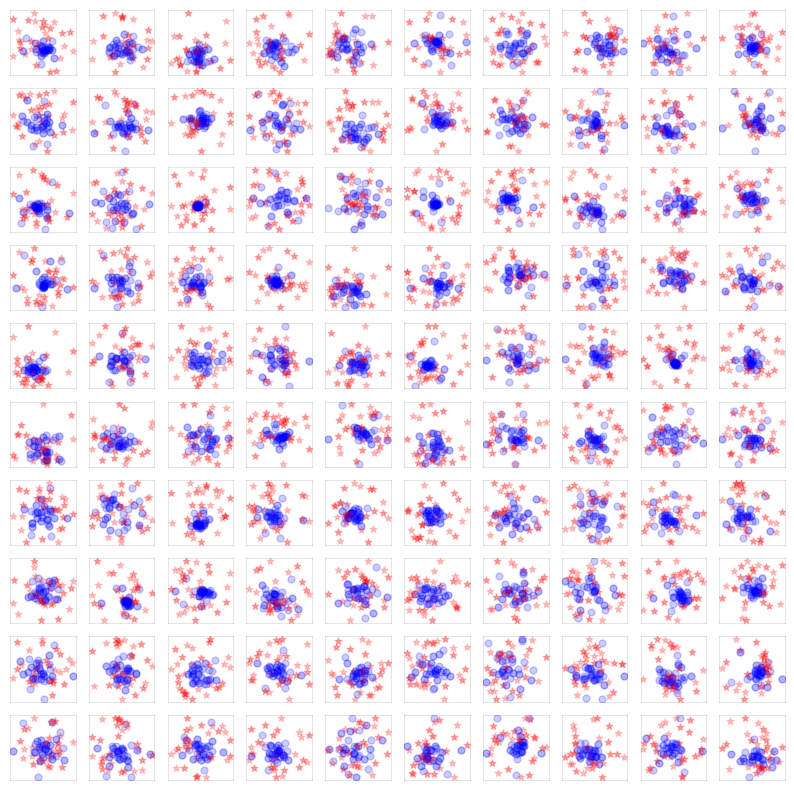

In [34]:
zf_real = torch.tensor(z_viz[:106*30, :]).view(106, -1, 2)
zf_cros = torch.tensor(z_viz[106*30:, :]).view(106, -1, 2) 

fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(10, 10))
t = 0
for i in range(10):
    for j in range(10):   
        zf_real_t = zf_real[t, :, :]  
        zf_cros_t = zf_cros[t, :, :]  
        for s in range(30):
            if s%2==0:
                axs[i,j].scatter(zf_real_t[s, 0], zf_real_t[s, 1], marker="*", s=25, color='red', alpha=0.2)
                axs[i,j].scatter(zf_cros_t[s, 0], zf_cros_t[s, 1], marker="o", s=25, color='blue', alpha=0.3)
            else:
                axs[i,j].scatter(zf_cros_t[s, 0], zf_cros_t[s, 1], marker="o", s=25, color='blue', alpha=0.2)
                axs[i,j].scatter(zf_real_t[s, 0], zf_real_t[s, 1], marker="*", s=25, color='red', alpha=0.3)
                
        t += 1 
        
        axs[i,j].set_xlabel('')
        axs[i,j].set_ylabel('')

        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])
        axs[i,j].spines['top'].set_alpha(0.1)
        axs[i,j].spines['right'].set_alpha(0.1)
        axs[i,j].spines['bottom'].set_alpha(0.1)
        axs[i,j].spines['left'].set_alpha(0.1) 

Calculating PHATE...
  Running PHATE on 50880 observations and 1024 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...


/gpfs/gibbs/project/krishnaswamy_smita/aa2793/conda_envs/pytorch_fmri/lib/python3.9/site-packages/phate/phate.py:186: FutureWarning: k is deprecated. Please use knn in future.
  warnings.warn("k is deprecated. Please use knn in future.", FutureWarning)


    Calculated PCA in 1.16 seconds.
    Calculating KNN search...
    Calculated KNN search in 528.94 seconds.
    Calculating affinities...
    Calculated affinities in 63.11 seconds.
  Calculated graph and diffusion operator in 593.70 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 23.26 seconds.
    Calculating KMeans...
    Calculated KMeans in 2.61 seconds.
  Calculated landmark operator in 28.62 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.06 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 4.34 seconds.
Calculated PHATE in 626.75 seconds.
torch.Size([25440, 2])
torch.Size([25440, 2])


<function matplotlib.pyplot.show(close=None, block=None)>

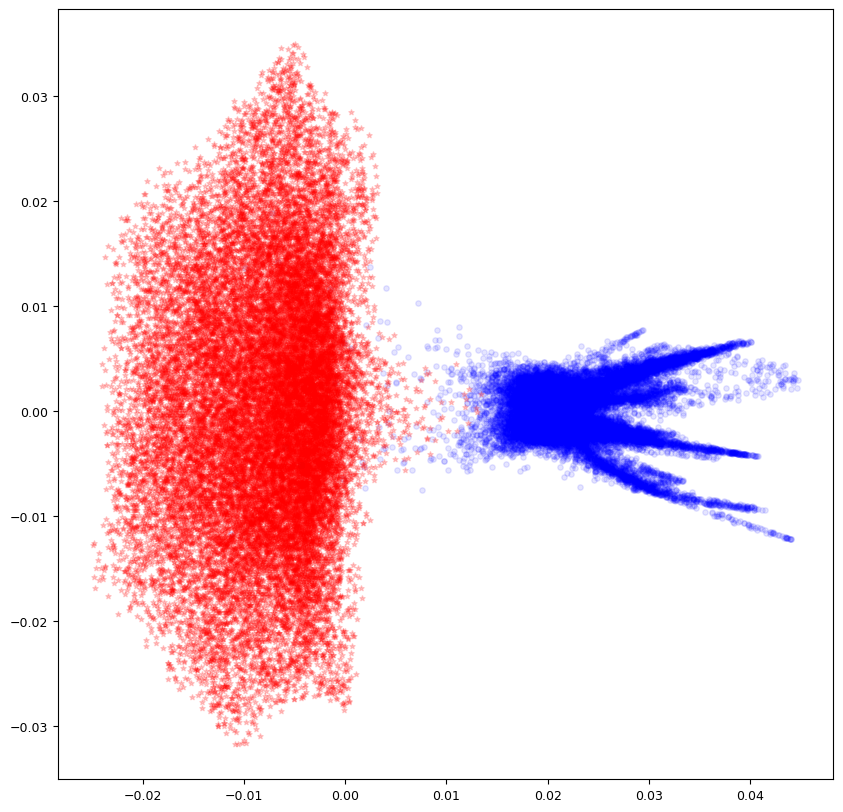

In [35]:
zf = torch.cat((zm_spatio, zm_temporal_spatial), dim=0)
z_viz = phate.PHATE(2,  k=40, t = 5).fit_transform(zf.detach().reshape(-1, zf.shape[-1]))
# z_viz = PCA(2).fit_transform(zf.detach().reshape(-1, zf.shape[-1]).numpy())   

zf_real = torch.tensor(z_viz[:106*240, :]) 
zf_cros = torch.tensor(z_viz[106*240:, :]) 

print(zf_real.shape)
print(zf_cros.shape)

plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 9})  
plt.scatter(zf_real[:, 0], zf_real[:, 1], marker="o", s=15, color='blue', alpha=0.1)
plt.scatter(zf_cros[:, 0], zf_cros[:, 1], marker="*", s=15, color='red', alpha=0.2)
 
plt.show

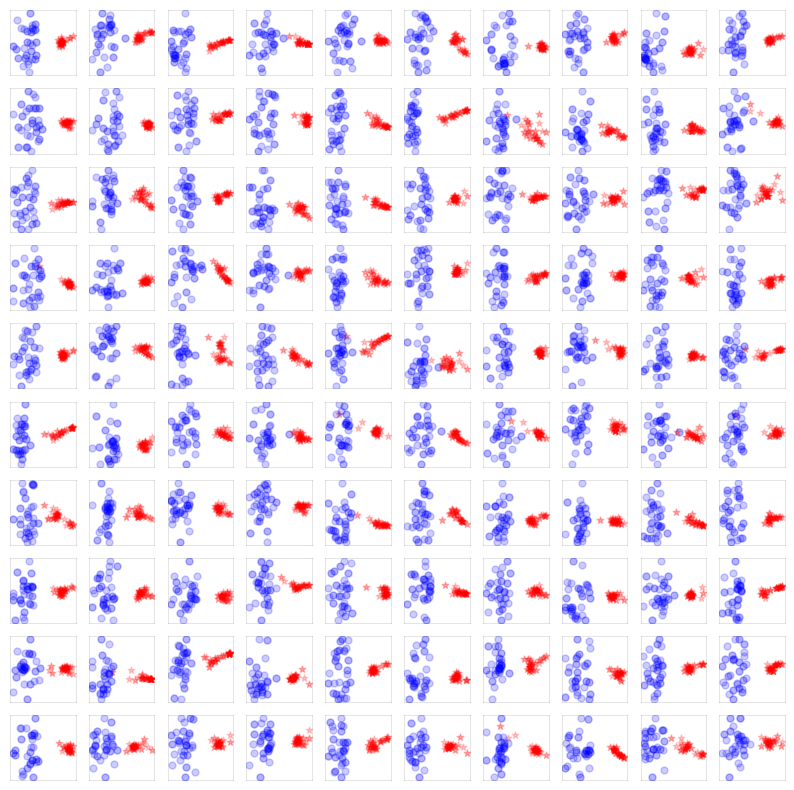

In [36]:
zf_real = torch.tensor(z_viz[:106*240, :]).view(106, -1, 2)
zf_cros = torch.tensor(z_viz[106*240:, :]).view(106, -1, 2) 

fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(10, 10))
t = 0
for i in range(10):
    for j in range(10):   
        zf_real_t = zf_real[t, :, :]  
        zf_cros_t = zf_cros[t, :, :]  
        for s in range(30):
            if s%2==0:
                axs[i,j].scatter(zf_real_t[s, 0], zf_real_t[s, 1], marker="*", s=25, color='red', alpha=0.2)
                axs[i,j].scatter(zf_cros_t[s, 0], zf_cros_t[s, 1], marker="o", s=25, color='blue', alpha=0.3)
            else:
                axs[i,j].scatter(zf_cros_t[s, 0], zf_cros_t[s, 1], marker="o", s=25, color='blue', alpha=0.2)
                axs[i,j].scatter(zf_real_t[s, 0], zf_real_t[s, 1], marker="*", s=25, color='red', alpha=0.3)
                
        t += 1 
        
        axs[i,j].set_xlabel('')
        axs[i,j].set_ylabel('')

        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])
        axs[i,j].spines['top'].set_alpha(0.1)
        axs[i,j].spines['right'].set_alpha(0.1)
        axs[i,j].spines['bottom'].set_alpha(0.1)
        axs[i,j].spines['left'].set_alpha(0.1) 

torch.Size([212, 30, 1024])
(6360, 2)


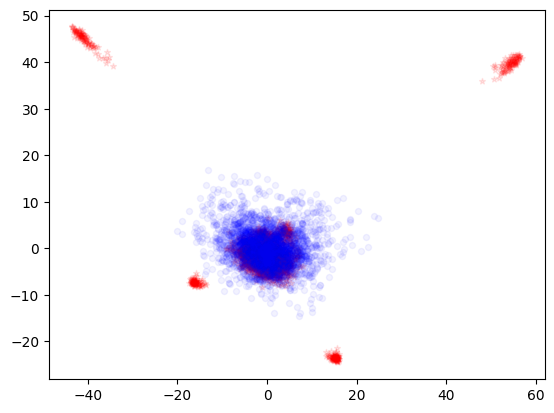

In [7]:
# def pca_phate(x, viz_method = 'phate', colors= 'red'):
#     plt.figure(figsize=(10, 10))
#     plt.rcParams.update({'font.size': 9}) 
#     x_viz = x.reshape(-1, x.shape[-1]).numpy()
#     if viz_method == 'phate':
#         z_viz = phate.PHATE(2,  k=15, t = 5).fit_transform(x_viz) 
#     elif viz_method == 'pca': 
#         z_viz = PCA(2).fit_transform(x_viz) 
#     plt.scatter(z_viz[:, 0], z_viz[:, 1], marker="o", s=15, color=colors, alpha=0.3)
#     print(z_viz.shape)
#     return z_viz

# print(zf_temporal_spatial.shape)
# print(zf_spatio.shape)
zf = torch.cat((zf_spatio, zf_temporal_spatial), dim=0)
z_viz = PCA(2).fit_transform(zf.detach().reshape(-1, zf.shape[-1]).numpy())   

print(zf.shape) 
print(z_viz.shape)

# zf_real = torch.tensor(z_viz[:106*30, :]).view(106, -1, 2)
# zf_cros = torch.tensor(z_viz[106*30:, :]).view(106, -1, 2)
# plt.figure(figsize=(10, 10))
# plt.rcParams.update({'font.size': 9})  
# for t in range(zf_cros.shape[0]):
#     zf_real_t = zf_real[t, :, :]  
#     zf_cros_t = zf_cros[t, :, :]  
#     plt.scatter(zf_real_t[:, 0], zf_real_t[:, 1], marker="*", s=25, color=colors[t], alpha=0.5)
#     plt.scatter(zf_cros_t[:, 0], zf_cros_t[:, 1], marker="o", s=25, color=colors[t], alpha=0.3)
# plt.show

plt.scatter(z_viz[:106*30, 0], z_viz[:106*30, 1], marker="*", s=19, color='red', alpha=0.1)
plt.scatter(z_viz[106*30:, 0], z_viz[106*30:, 1], marker="o", s=19, color='blue', alpha=0.05)

In [ ]:
z_

torch.Size([106, 30, 2])


<function matplotlib.pyplot.show(close=None, block=None)>

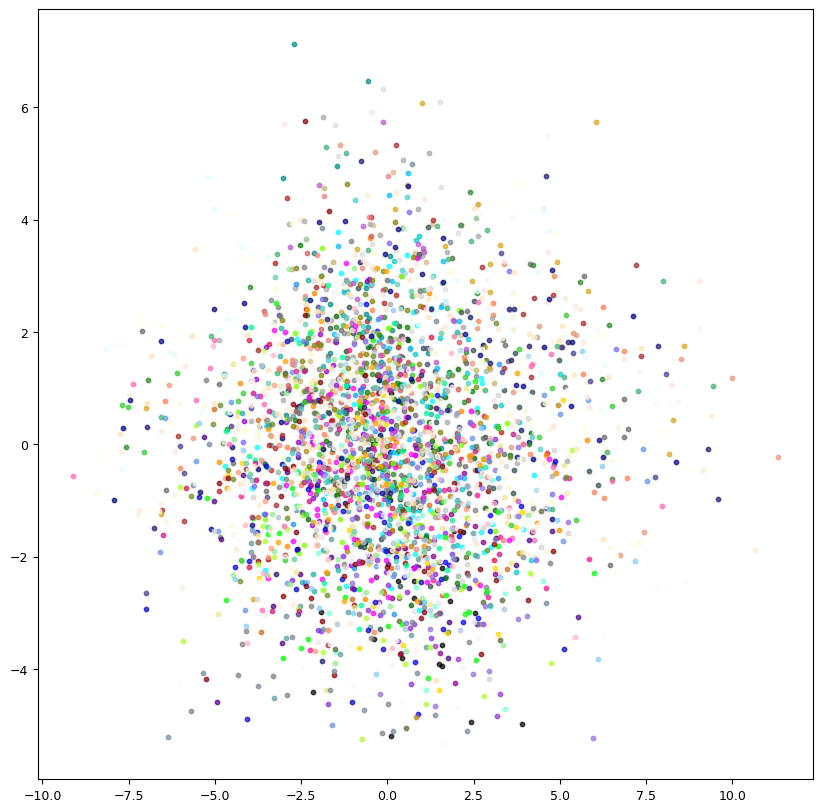

In [69]:
zf_conv_viz = torch.tensor(zf_tf_viz).view(106, 30, -1)
# zf_conv_viz = torch.tensor(zf_conv_viz).view(106, -1)
plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 9}) 
alpha = [1/x for x in range(1, 107)]
print(zf_conv_viz.shape)
for t in range(zf_conv_viz.shape[0]):
    zf_conv_viz_t = zf_conv_viz[t,  :]
    plt.scatter(zf_conv_viz_t[:, 0], zf_conv_viz_t[:, 1], marker="o", s=10 , color=colors[t], alpha=0.7)
#     plt.scatter(zf_conv_viz_t[:, 0], zf_conv_viz_t[:, 1], marker="o", s=60 , color='red', alpha=alpha[t])
plt.show


# zf_conv_viz = torch.tensor(zf_conv_viz).view(106, 30, -1)
# plt.figure(figsize=(10, 10))
# plt.rcParams.update({'font.size': 9}) 
# print(zf_conv_viz.shape)
# for t in range(zf_conv_viz.shape[0]):
#     zf_conv_viz_t = zf_conv_viz[t, :, :]  
#     plt.scatter(zf_conv_viz_t[:, 0], zf_conv_viz_t[:, 1], marker="o", s=15, color=colors[t], alpha=0.8)
# plt.show

------------------------ Phate of MEG  ------------------------
Calculating PHATE...
  Running PHATE on 25440 observations and 20484 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...


/gpfs/gibbs/project/krishnaswamy_smita/aa2793/conda_envs/pytorch_fmri/lib/python3.9/site-packages/phate/phate.py:186: FutureWarning: k is deprecated. Please use knn in future.
  warnings.warn("k is deprecated. Please use knn in future.", FutureWarning)


    Calculated PCA in 6.25 seconds.
    Calculating KNN search...
    Calculated KNN search in 75.27 seconds.
    Calculating affinities...
    Calculated affinities in 14.09 seconds.
  Calculated graph and diffusion operator in 95.78 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 8.28 seconds.
    Calculating KMeans...
    Calculated KMeans in 2.26 seconds.
  Calculated landmark operator in 12.48 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.13 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 3.85 seconds.
Calculated PHATE in 112.26 seconds.
(25440, 2)


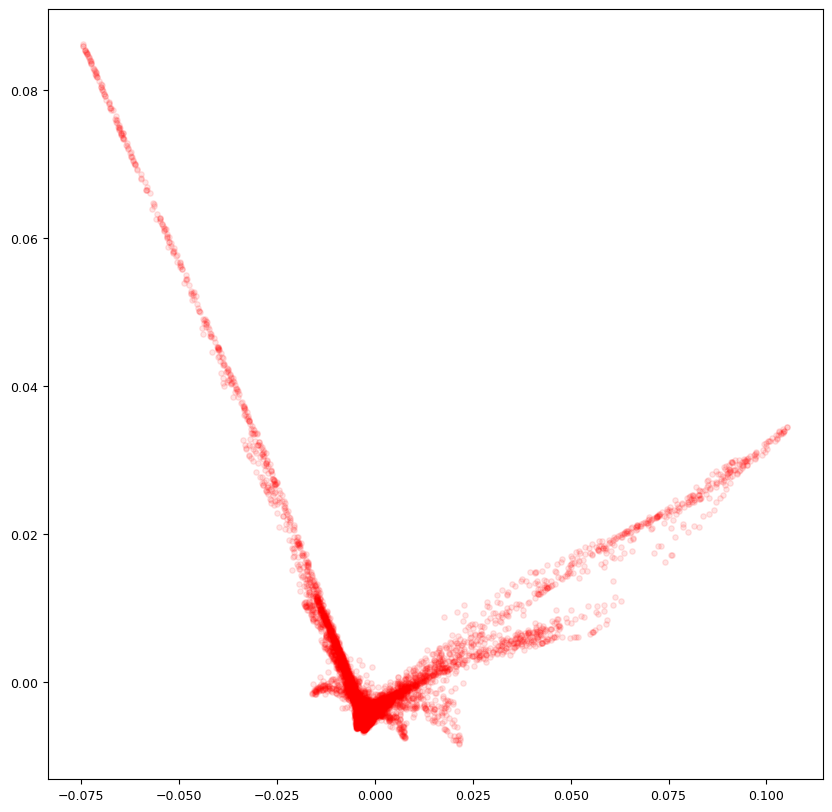

In [21]:
print('------------------------ Phate of MEG  ------------------------')
zm_viz = pca_phate(xm, viz_method = 'phate')


------------------------ Phate of Recunstructed MEG  ------------------------
Calculating PHATE...
  Running PHATE on 25440 observations and 20484 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...


/gpfs/gibbs/project/krishnaswamy_smita/aa2793/conda_envs/pytorch_fmri/lib/python3.9/site-packages/phate/phate.py:186: FutureWarning: k is deprecated. Please use knn in future.
  warnings.warn("k is deprecated. Please use knn in future.", FutureWarning)


    Calculated PCA in 5.72 seconds.
    Calculating KNN search...
    Calculated KNN search in 75.33 seconds.
    Calculating affinities...
    Calculated affinities in 0.30 seconds.
  Calculated graph and diffusion operator in 81.40 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 3.12 seconds.
    Calculating KMeans...
    Calculated KMeans in 1.57 seconds.
  Calculated landmark operator in 5.61 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.07 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 4.36 seconds.
Calculated PHATE in 91.45 seconds.
(25440, 2)


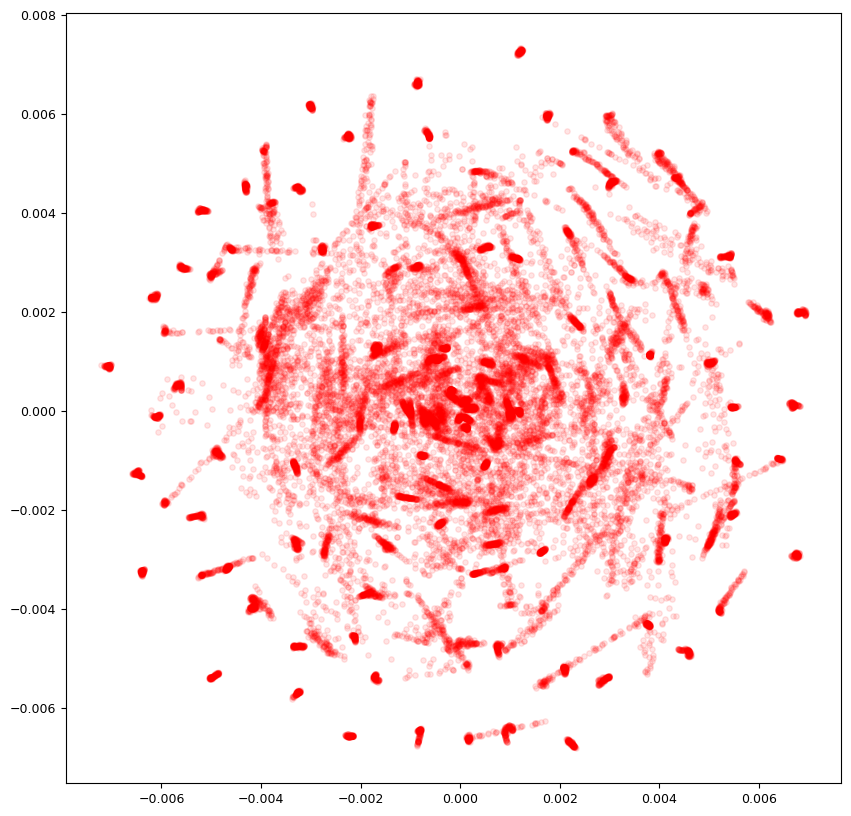

In [83]:
print('------------------------ Phate of Recunstructed MEG  ------------------------')
zm_viz = pca_phate(xm_hat.detach(), viz_method = 'phate')

------------------------ Phate of fMRI  ------------------------
Calculating PHATE...
  Running PHATE on 3180 observations and 20484 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.75 seconds.
    Calculating KNN search...
    Calculated KNN search in 1.04 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 1.82 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 0.12 seconds.
    Calculating KMeans...
    Calculated KMeans in 1.01 seconds.
  Calculated landmark operator in 1.70 seconds.
  Calculating optimal t...
    Automatically selected t = 34
  Calculated optimal t in 0.43 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.06 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 3.31 seconds.
Calculated PHATE in 7.32 seconds.
(3180, 2)


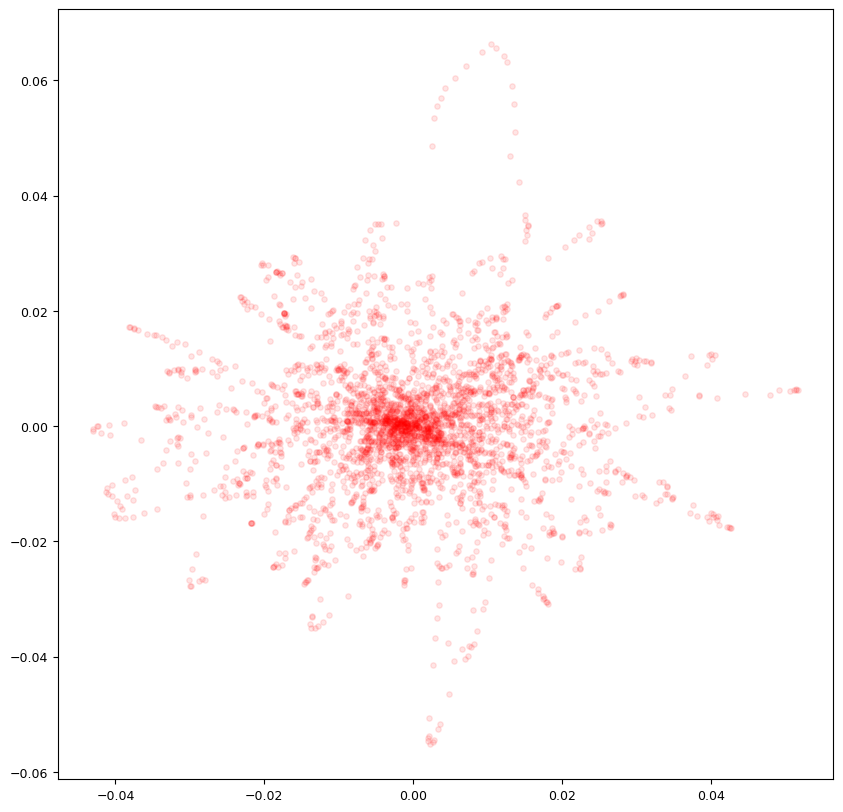

In [105]:
def pca_phate(x, viz_method = 'phate'):
    plt.figure(figsize=(10, 10))
    plt.rcParams.update({'font.size': 9}) 
    x_viz = x.view(-1, x.shape[-1]).numpy()
    if viz_method == 'phate':
        z_viz = phate.PHATE(2).fit_transform(x_viz)
#         z_viz = phate.PHATE(2,  k=2, t=10).fit_transform(x_viz) 
    elif viz_method == 'pca': 
        z_viz = PCA(2).fit_transform(x_viz) 
    plt.scatter(z_viz[:, 0], z_viz[:, 1], marker="o", s=15, color='red', alpha=0.1)
    print(z_viz.shape)
    return z_viz

print('------------------------ Phate of fMRI  ------------------------')
zf_viz = pca_phate(xf, viz_method = 'phate')


/tmp/ipykernel_4165993/1914395599.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  zf_viz = torch.tensor(zf_viz).view(106, 30, -1)


torch.Size([106, 30, 2])


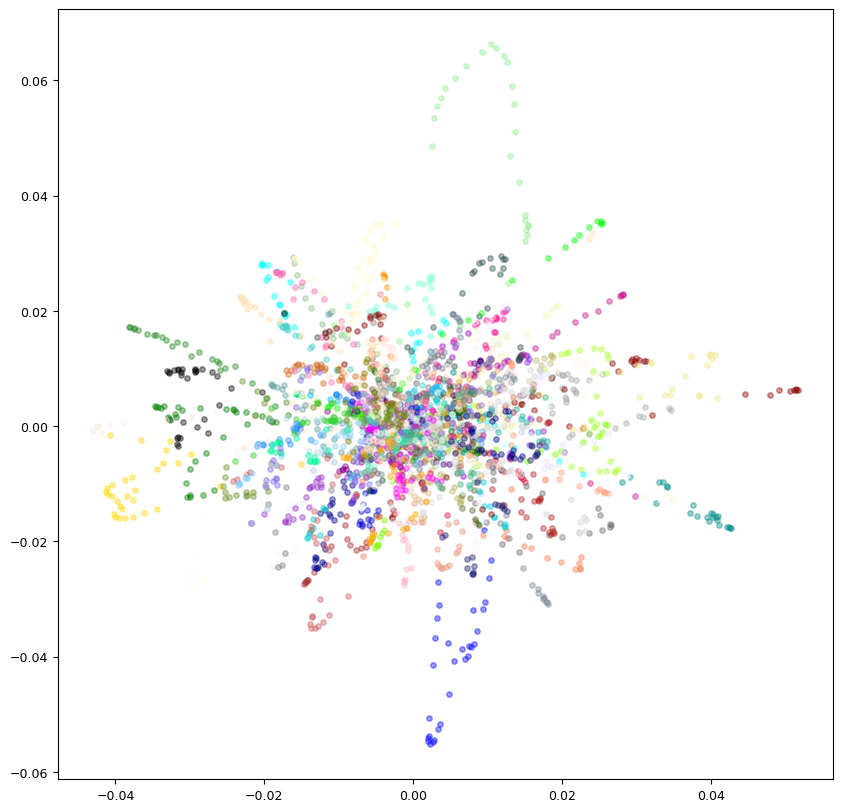

In [109]:
zf_viz = torch.tensor(zf_viz).view(106, 30, -1)
plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 9}) 
print(zf_viz.shape)
for t in range(zf_viz.shape[0]):
    zf_viz_t = zf_viz[t, :, :]
    plt.scatter(zf_viz_t[:, 0], zf_viz_t[:, 1], marker="o", s=15, color=colors[t], alpha=0.4)
    

------------------------ Phate of Recunstructed fMRI  ------------------------
Calculating PHATE...
  Running PHATE on 3180 observations and 20484 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.80 seconds.
    Calculating KNN search...
    Calculated KNN search in 1.04 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 1.88 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 0.14 seconds.
    Calculating KMeans...
    Calculated KMeans in 1.47 seconds.
  Calculated landmark operator in 2.19 seconds.
  Calculating optimal t...
    Automatically selected t = 43
  Calculated optimal t in 0.41 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.07 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 3.27 seconds.
Calculated PHATE in 7.82 seconds.
(3180, 2)


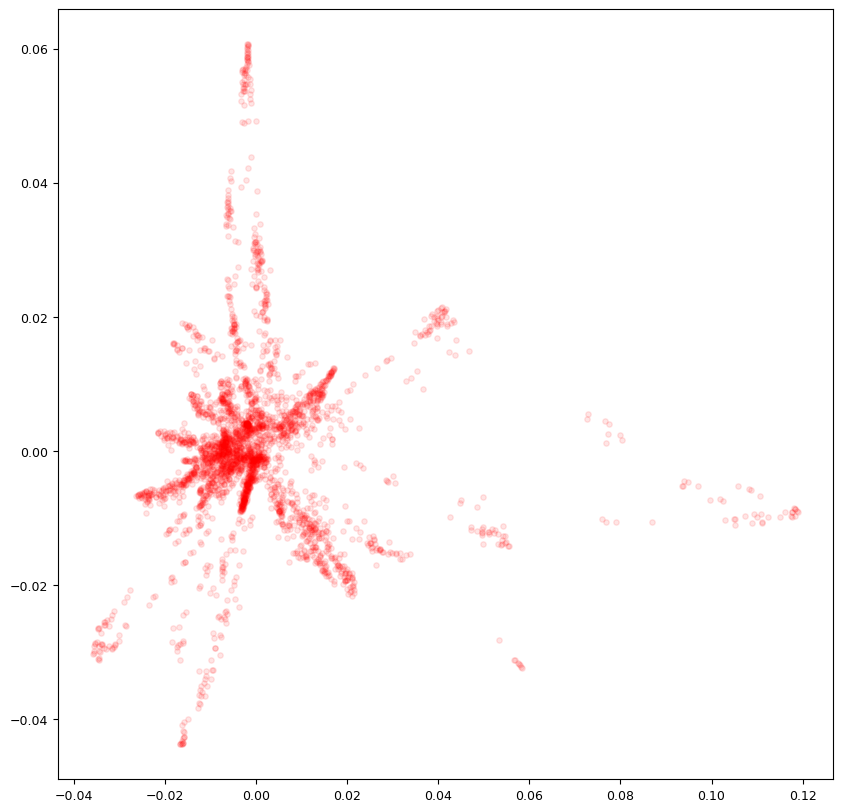

In [110]:
print('------------------------ Phate of Recunstructed fMRI  ------------------------')
zf_viz_hat = pca_phate(xf_hat.detach(), viz_method = 'phate')

torch.Size([106, 30, 2])


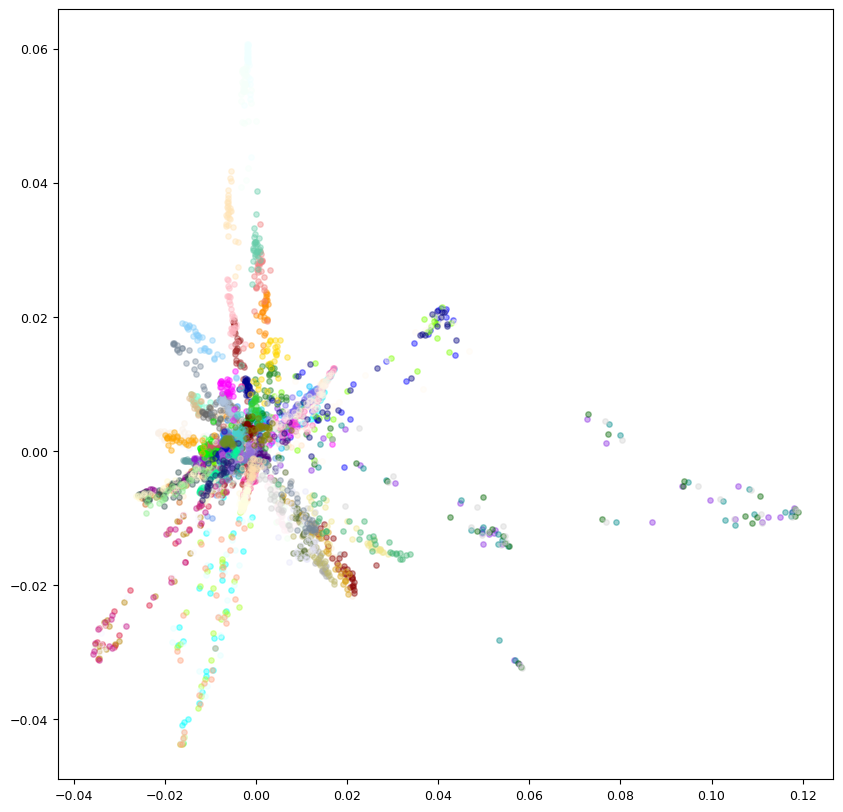

In [111]:
zf_viz_hat = torch.tensor(zf_viz_hat).view(106, 30, -1)
plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 9}) 
print(zf_viz.shape)
for t in range(zf_viz_hat.shape[0]):
    zf_viz_hat_t = zf_viz_hat[t, :, :]
    plt.scatter(zf_viz_hat_t[:, 0], zf_viz_hat_t[:, 1], marker="o", s=15, color=colors[t], alpha=0.4)

In [26]:
print("xf.shape", xf.shape)
print("xm.shape", xm.shape)

print("zf_hat.shape", zm_hat.shape)
print("zm_hat.shape", zf_hat.shape)

print("xf_hat.shape", xf_hat.shape)
print("xm_hat.shape", xm_hat.shape)

xf.shape torch.Size([106, 30, 20484])
xm.shape torch.Size([106, 240, 20484])
zf_hat.shape torch.Size([106, 240, 1024])
zm_hat.shape torch.Size([106, 30, 1024])
xf_hat.shape torch.Size([106, 30, 20484])
xm_hat.shape torch.Size([106, 240, 20484])


In [19]:
# xf = xf.view(-1, xf.shape[-1])
# xm = xm.view(-1, xm.shape[-1]) 
# z_all = torch.cat((xf, xm), dim=0)

zm_hat = zm_hat.view(-1, zm_hat.shape[-1])
zf_hat = zf_hat.view(-1, zf_hat.shape[-1]) 
z_all_hat = torch.cat((zm_hat, zf_hat), dim=0)
z_viz_hat = umap.UMAP().fit_transform(z_all_hat.detach().numpy()) 





(3180, 2) (25440, 2)


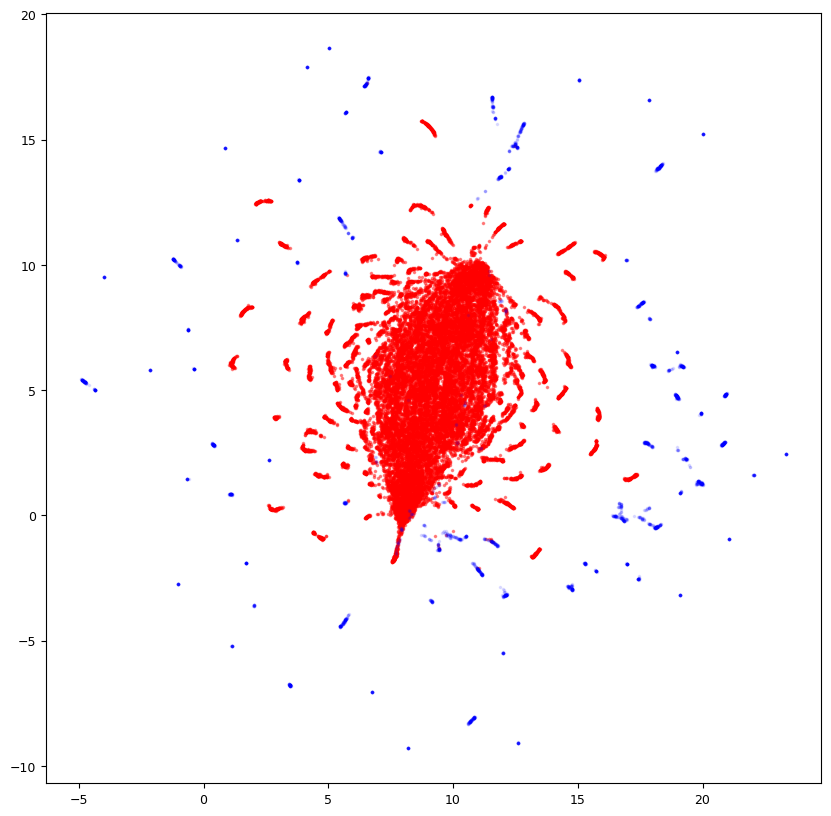

In [20]:
zm_viz = z_viz_hat[:240*106, :]
zf_viz = z_viz_hat[240*106:, :]
print(zf_viz.shape, zm_viz.shape)

colors = ['red', 'blue']
plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 9})
plt.scatter(zm_viz[:, 0], zm_viz[:, 1], marker=".", s = 10, color = colors[0], alpha=0.4)
plt.scatter(zf_viz[:, 0], zf_viz[:, 1], marker=".", s = 10, color = colors[1], alpha=0.1)
# zz = torch.cat((z_all, z_all_hat), dim=0)

In [82]:
# zz_viz = umap.UMAP().fit_transform(zz.detach().numpy()) 


z_viz = umap.UMAP().fit_transform(z_all.detach().numpy()) 
z_viz_hat = umap.UMAP().fit_transform(z_all_hat.detach().numpy()) 




/gpfs/gibbs/project/krishnaswamy_smita/aa2793/conda_envs/pytorch_fmri/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
colors = ['red', 'blue']
plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 9})
# plt.scatter(z_viz[:, 0], z_viz[:, 1], marker=".", s = 6, color = colors[0], alpha=0.8)
plt.scatter(z_viz_hat[:, 0], z_viz_hat[:, 1], marker=".", s = 9, color = colors[0], alpha=0.1)

z_viz.shape (28620, 2)


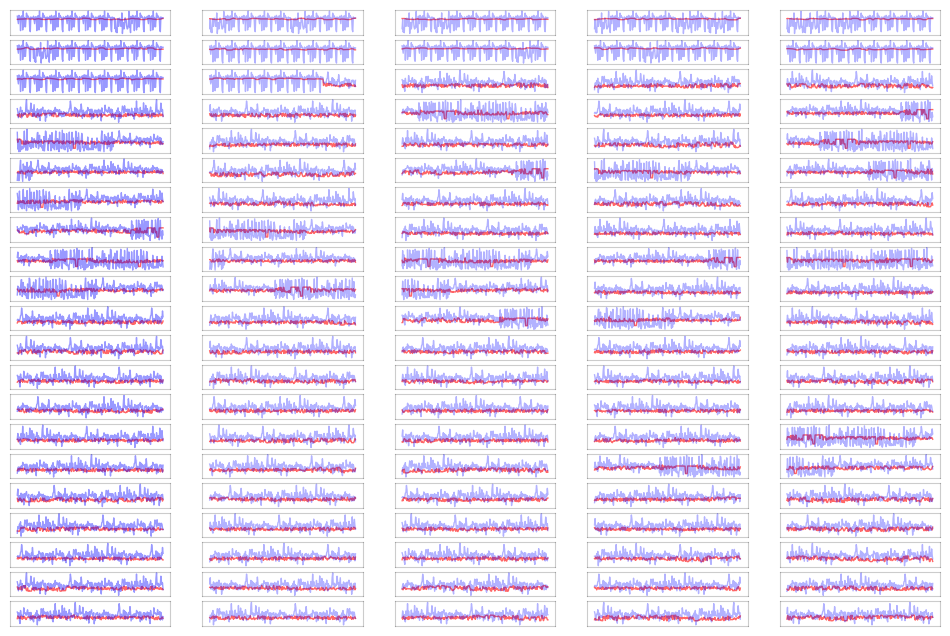

In [69]:


print("z_viz.shape", z_viz.shape)
data1 = torch.tensor(z_viz)  
data2 = torch.tensor(z_viz_hat)

data1 = data1.reshape(106, -1, 2)  
data2 = data2.reshape(106, -1, 2)
fig, axs = plt.subplots(nrows=21, ncols=5, figsize=(12, 8))
 
time = 0
for i in range(21):
    for j in range(5):
        x1 = data1[time, :, :].numpy() 
        x2 = data2[time, :, :].numpy() 
        time += 1
        if j == 0:
            axs[i,j].plot(x1[:, 0], color='red', alpha=0.6, linewidth=1) 
            axs[i,j].plot(x2[:, 0], color='blue', alpha=0.4, linewidth=1) 
        elif j == 1:
            axs[i,j].plot(x1[:, 0], color='red', alpha=0.6, linewidth=1) 
            axs[i,j].plot(x2[:, 0], color='blue', alpha=0.3, linewidth=1)
        else:
            axs[i,j].plot(x1[:, 0], color='red', alpha=0.6, linewidth=1)  
            axs[i,j].plot(x2[:, 0], color='blue', alpha=0.3, linewidth=1)
        axs[i,j].set_xlabel('')
        axs[i,j].set_ylabel('')
        
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])
        axs[i,j].spines['top'].set_alpha(0.2)
        axs[i,j].spines['right'].set_alpha(0.2)
        axs[i,j].spines['bottom'].set_alpha(0.2)
        axs[i,j].spines['left'].set_alpha(0.2) 

# show the plot
plt.show()

z_viz_hat.shape (28620, 2)


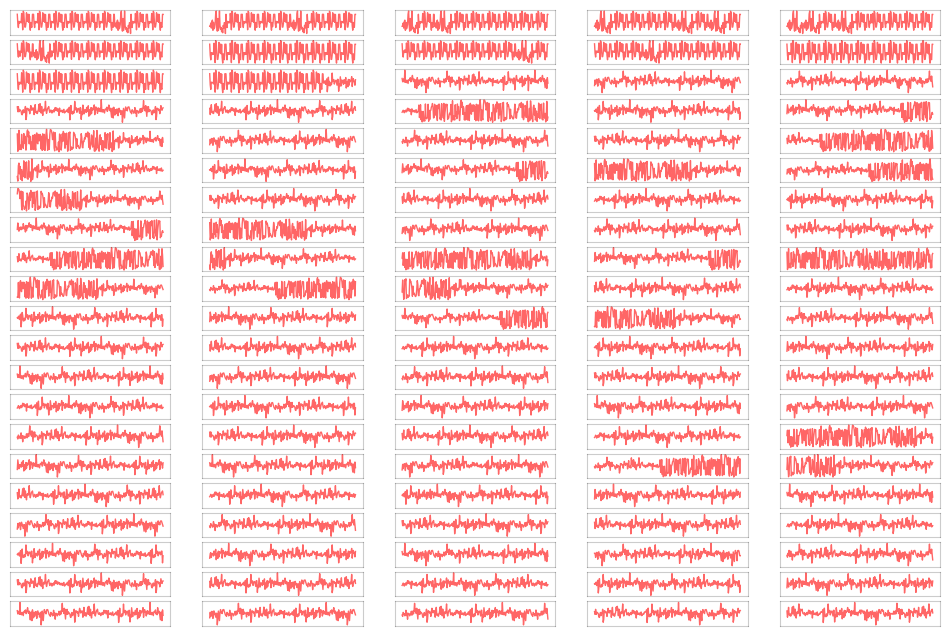

In [48]:
print("z_viz_hat.shape", z_viz_hat.shape)
data = torch.tensor(z_viz_hat)  

data = data.reshape(106, -1, 2)  
fig, axs = plt.subplots(nrows=21, ncols=5, figsize=(12, 8))
 
time = 0
for i in range(21):
    for j in range(5):
        x = data[time, :, :].numpy() 
        time += 1
        if j == 0:
            axs[i,j].plot(x[:, 0], color='red', alpha=0.6, linewidth=1) 
        elif j == 1:
            axs[i,j].plot(x[:, 0], color='red', alpha=0.6, linewidth=1)  
        else:
            axs[i,j].plot(x[:, 0], color='red', alpha=0.6, linewidth=1)  
        axs[i,j].set_xlabel('')
        axs[i,j].set_ylabel('')
        
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])
        axs[i,j].spines['top'].set_alpha(0.2)
        axs[i,j].spines['right'].set_alpha(0.2)
        axs[i,j].spines['bottom'].set_alpha(0.2)
        axs[i,j].spines['left'].set_alpha(0.2) 

# show the plot
plt.show()

In [32]:
# zf_hat = zf_hat.view(-1, zf_hat.shape[-1])
# zm_hat = zm_hat.view(-1, zm_hat.shape[-1]) 
# z_all = torch.cat((zf_hat, zm_hat), dim=0) 
# # z_viz = phate.PHATE().fit_transform(z_all.detach().numpy())
# z_viz = umap.UMAP().fit_transform(z_all.detach().numpy()) 

xf_hat = xf_hat.view(-1, xf_hat.shape[-1])
xm_hat = xm_hat.view(-1, xm_hat.shape[-1]) 
z_all = torch.cat((xf_hat, xm_hat), dim=0) 
# z_viz = phate.PHATE().fit_transform(z_all.detach().numpy())
z_viz = umap.UMAP().fit_transform(z_all.detach().numpy()) 

print(zf_hat.shape)
print(zm_hat.shape)
print(z_viz.shape)

torch.Size([106, 30, 1024])
torch.Size([106, 240, 1024])
(28620, 2)


(3180, 2) (25440, 2)


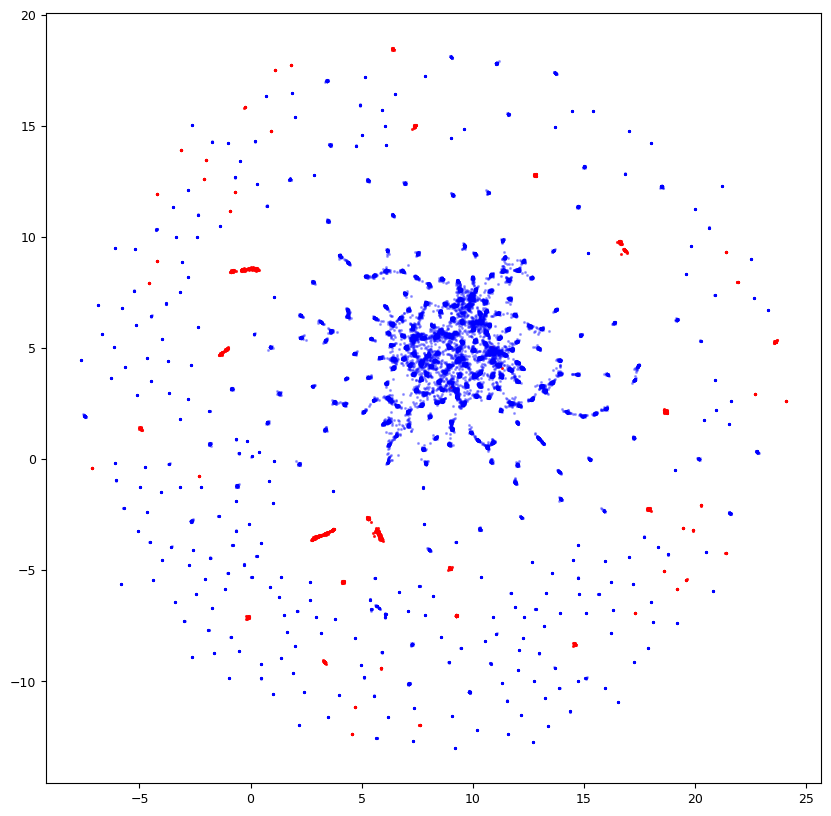

In [37]:
 
zf_viz = z_viz[:xf_hat.shape[0]]
zm_viz = z_viz[xf_hat.shape[0]:]
print(zf_viz.shape, zm_viz.shape)

colors = ['red', 'blue']
plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 9})
plt.scatter(zf_viz[:, 0], zf_viz[:, 1], marker=".", s = 6, color = colors[0], alpha=0.8)
plt.scatter(zm_viz[:, 0], zm_viz[:, 1], marker=".", s = 6, color = colors[1], alpha=0.3)
# # plt.savefig('raw_data_col_phate_visualization.pdf')

In [124]:
# plt.figure(figsize=(8, 8))
# plt.rcParams.update({'font.size': 9})
# colors = ['blue', 'red']

 


data = xm.view(-1, xm.shape[-1]) 
print(data.shape)
xm_viz = umap.UMAP().fit_transform(data.numpy())  



data = xf.view(-1, xm.shape[-1]) 
print(data.shape)
xf_viz = umap.UMAP().fit_transform(data.numpy())  



# data = xm.numpy()
# data = data[0, :, :] 
 

# n_sample = data.shape[0] 
# alphas = [x/n_sample for x in range(240)]


# x = umap.UMAP().fit_transform(data)  
# for t in range(n_sample):
#     plt.scatter(x[t, 0], x[t, 1], marker="o", s=40, color=colors[0], alpha = alphas[t]) 
# plt.show()


# plt.figure(figsize=(8, 4))
# plt.rcParams.update({'font.size': 9})
# plt.plot(range(n_sample), x[:, 0], label='umap-1')
# plt.plot(range(n_sample), x[:, 1], label='umap-2')
# plt.legend(loc='upper right', frameon=False, fontsize=12)
 

    
    

 

torch.Size([25440, 20484])
torch.Size([3180, 20484])


# MEG DATA 

## [1] MEG over one minute (in each subplot) over the 105 minutes (all subplots)

xm.shape torch.Size([106, 240, 20484])


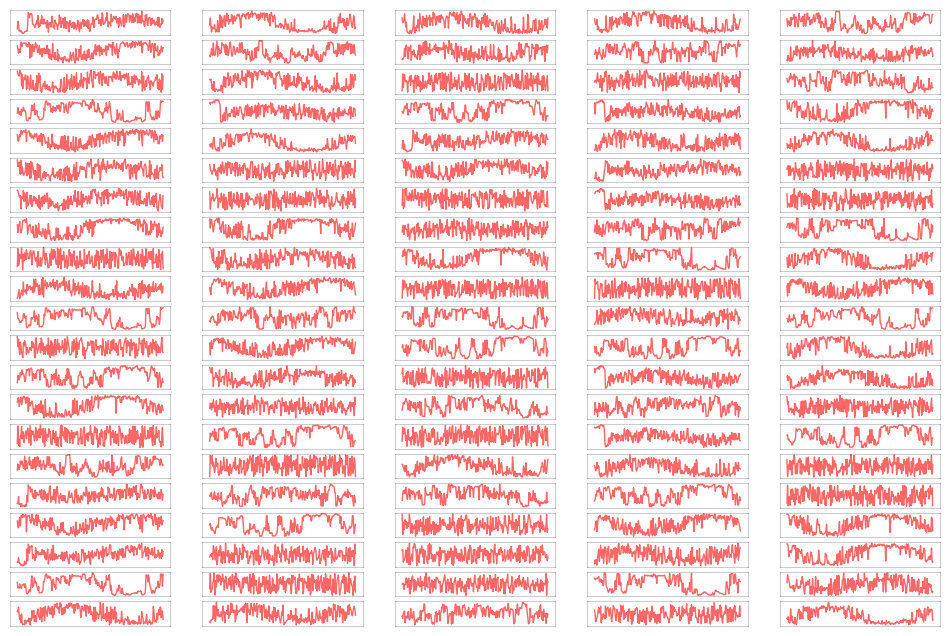

In [141]:
print("xm.shape", xm.shape)
data = torch.tensor(xm_viz)  

data = data.reshape(xm.shape[0], xm.shape[1], -1)  
fig, axs = plt.subplots(nrows=21, ncols=5, figsize=(12, 8))
 
time = 0
for i in range(21):
    for j in range(5):
        x = data[time, :, :].numpy() 
        time += 1
        if j == 0:
            axs[i,j].plot(x[:, 0], color='red', alpha=0.6, linewidth=1)
#             axs[i,j].plot(x[:, 1]) #, y1)  
        elif j == 1:
            axs[i,j].plot(x[:, 0], color='red', alpha=0.6, linewidth=1) 
#             axs[i,j].plot(x[:, 1]) #, y2) 
        else:
            axs[i,j].plot(x[:, 0], color='red', alpha=0.6, linewidth=1) 
#             axs[i,j].plot(x[:, 1]) 
        # axs[i,j].set_title(f"Plot ({i},{j})")
        axs[i,j].set_xlabel('')
        axs[i,j].set_ylabel('')
        
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])
        axs[i,j].spines['top'].set_alpha(0.2)
        axs[i,j].spines['right'].set_alpha(0.2)
        axs[i,j].spines['bottom'].set_alpha(0.2)
        axs[i,j].spines['left'].set_alpha(0.2)
#         axs[i,j].spines['top'].set_visible(False)
#         axs[i,j].spines['right'].set_visible(False)
#         axs[i,j].spines['bottom'].set_visible(False)
#         axs[i,j].spines['left'].set_visible(False)

# show the plot
plt.show()

xf.shape torch.Size([106, 30, 20484])


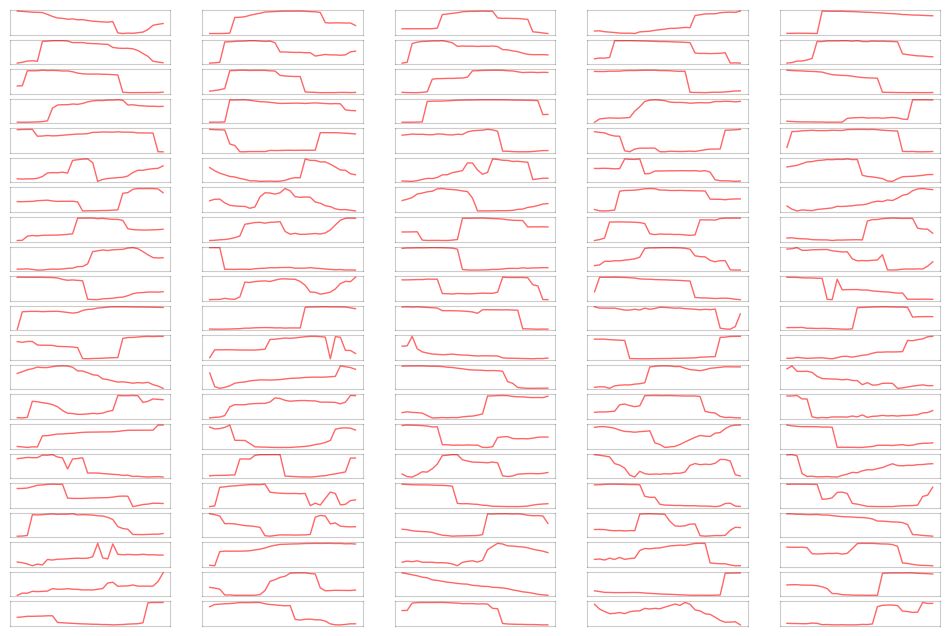

In [143]:
print("xf.shape", xf.shape)
data = torch.tensor(xf_viz)  

data = data.reshape(xf.shape[0], xf.shape[1], -1)  
fig, axs = plt.subplots(nrows=21, ncols=5, figsize=(12, 8))
 
time = 0
for i in range(21):
    for j in range(5):
        x = data[time, :, :].numpy() 
        time += 1
        if j == 0:
            axs[i,j].plot(x[:, 0], color='red', alpha=0.6, linewidth=1)
#             axs[i,j].plot(x[:, 1]) #, y1)  
        elif j == 1:
            axs[i,j].plot(x[:, 0], color='red', alpha=0.6, linewidth=1) 
#             axs[i,j].plot(x[:, 1]) #, y2) 
        else:
            axs[i,j].plot(x[:, 0], color='red', alpha=0.6, linewidth=1) 
#             axs[i,j].plot(x[:, 1]) 
        # axs[i,j].set_title(f"Plot ({i},{j})")
        axs[i,j].set_xlabel('')
        axs[i,j].set_ylabel('')
        
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([]) 
        axs[i,j].spines['top'].set_alpha(0.2)
        axs[i,j].spines['right'].set_alpha(0.2)
        axs[i,j].spines['bottom'].set_alpha(0.2)
        axs[i,j].spines['left'].set_alpha(0.2)
#         axs[i,j].spines['top'].set_visible(False)
#         axs[i,j].spines['right'].set_visible(False)
#         axs[i,j].spines['bottom'].set_visible(False)
#         axs[i,j].spines['left'].set_visible(False)

# show the plot
plt.show()


# print("xf.shape", xf.shape)
# data = torch.tensor(xf_viz)  

# data = data.reshape(xf.shape[0], xf.shape[1], -1)  
# fig, axs = plt.subplots(nrows=21, ncols=5, figsize=(12, 8))
 
# time = 0
# for i in range(21):
#     for j in range(5):
#         x = data[time, :, :].numpy() 
#         time += 1
#         if j == 0:
#             axs[i,j].plot(x[:, 0]) 
#             axs[i,j].plot(x[:, 1]) #, y1)  
#         elif j == 1:
#             axs[i,j].plot(x[:, 0]) 
#             axs[i,j].plot(x[:, 1]) #, y2) 
#         else:
#             axs[i,j].plot(x[:, 0]) 
#             axs[i,j].plot(x[:, 1]) 
#         # axs[i,j].set_title(f"Plot ({i},{j})")
#         axs[i,j].set_xlabel('')
#         axs[i,j].set_ylabel('')
        
#         axs[i,j].set_xticks([])
#         axs[i,j].set_yticks([]) 

# # show the plot
# plt.show()